In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 Heatmap (Isı Haritası) Nedir?
Heatmap, verileri renklerle görselleştiren bir tablodur.

Her hücre bir sayısal değeri temsil eder, bu değer renk yoğunluğu ile ifade edilir.

Amaç:
Rakamları okumadan bile, hangi değerler yüksek, hangi değerler düşük hemen anlamanı sağlamaktır.

In [46]:
data = pd.read_excel('mart_linePlot.xlsx')
data.columns = data.columns.str.lower()

In [47]:
data.head()

,unnamed: 0,item_id,item_w,item_type,item_mrp,outlet_id,outlet_year,outlet_size,outlet_location_type,sales,tier
0,0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781,2
1,1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375,1
2,2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268,3
3,3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376,1
4,4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829,3


In [14]:
DataPiv = data.pivot_table(index='outlet_year' , columns='outlet_size' , values='sales')
DataPiv
# pivot_table() → Pandas kütüphanesinde bulunan, verileri özetleyip tablo halinde yeniden düzenlemeye yarayan güçlü bir fonksiyondur.
# 📌 Kısaca:
# Grupladığın verilerin ortalamasını, toplamını, sayısını vs. hesaplayarak kategorilere göre düzenli bir tablo (pivot) oluşturur.

outlet_size,High,Medium,Small
outlet_year,,,
1987,2015.037160,1792.973492,1917.302712
1988,1695.209700,1444.865311,1641.739583
1996,2265.268983,2272.371502,2219.790139
1997,2029.428925,1826.732664,1903.967543
1998,2306.542273,2279.666103,2233.775392
1999,2004.082749,1850.282194,1909.920236
2003,2261.028030,2158.063891,2190.118601
2004,1966.898730,1826.582596,1889.009488
2005,1935.238262,1010.230431,1215.937098


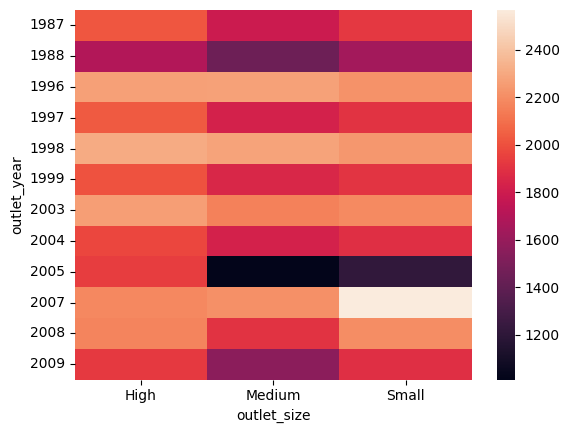

In [16]:
sns.heatmap(DataPiv)
plt.show()

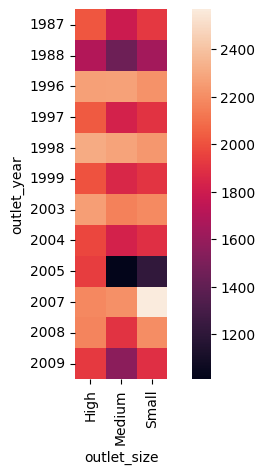

In [18]:
sns.heatmap(DataPiv , square=True)
# square=True ile hücreleri kare yaptık
plt.show()

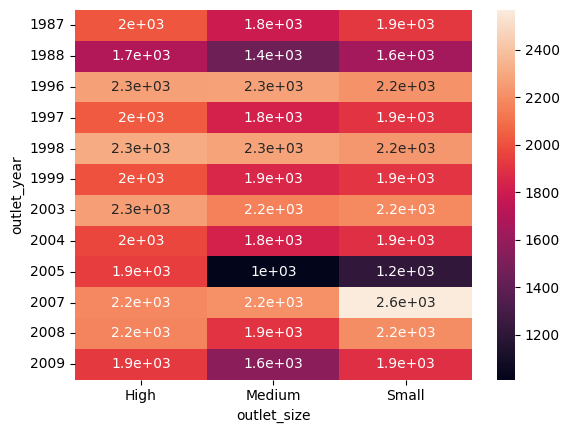

In [20]:
sns.heatmap(DataPiv , annot=True)
# annot=True ile hücrelerin içine değer yazdırdık.
plt.show()

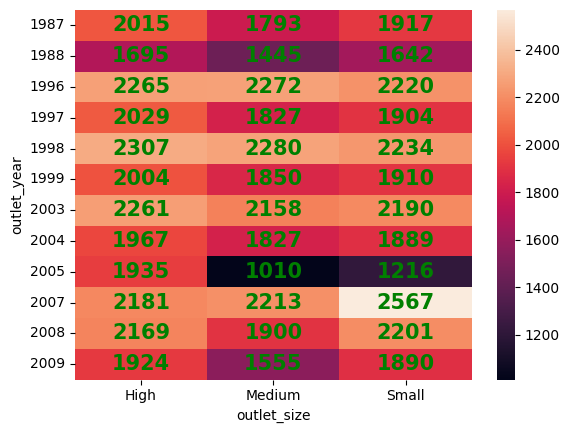

In [27]:
sns.heatmap(DataPiv ,
             annot=True, fmt='.0f' ,annot_kws=dict(size=15 , weight='bold' , color='green'))
# annot_kws ise bu yazıların stilini (font, boyut, kalınlık vs.) kontrol etmek için kullanılır.
# fmt='.0f' ile hücredki sayıların virgülden sonrasını görünmemesini sağladık.
plt.show()

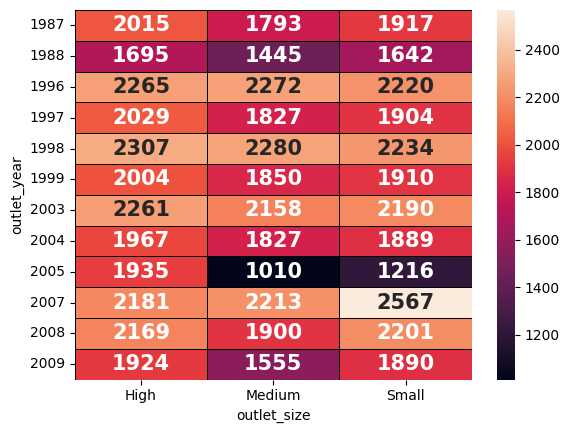

In [34]:
sns.heatmap(DataPiv , annot=True,
            fmt='.0f' , annot_kws=dict(size=15 , weight='bold'),
            linewidths=0.5,
            linecolor='black')
# linewidths=0.5 ile hücre aralarına çizgi koyduk
# linecolor='black' ile de hücre aralarında ki çizgilerin renklerini belirledik. 
plt.show()

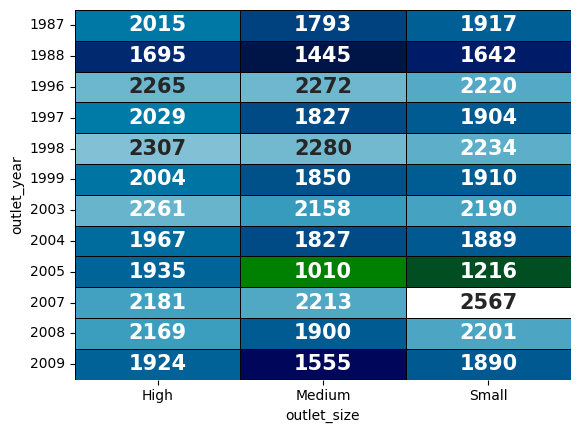

In [43]:
sns.heatmap(DataPiv , annot=True,
            fmt='.0f' , annot_kws=dict(size=15 , weight='bold'),
            linewidths=0.5, linecolor='black',
            cmap='ocean' , cbar=False)
# cmap ile Renk şemasımı belirledik
# cbar ile Renk skalasını kapattık

plt.show()


In [51]:
data.head()

,unnamed: 0,item_id,item_w,item_type,item_mrp,outlet_id,outlet_year,outlet_size,outlet_location_type,sales,tier
0,0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781,2
1,1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375,1
2,2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268,3
3,3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376,1
4,4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829,3


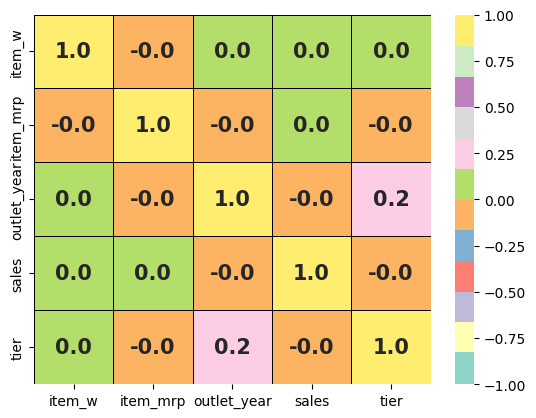

In [65]:
sns.heatmap(data[['item_w' , 'item_mrp' , 'outlet_year' , 'sales','tier']].corr()
            ,vmin=-1
            ,vmax=1
            ,center=0
            ,cmap='Set3'
            ,annot=True
            ,fmt='.1f'
            ,annot_kws=dict(size=15 , weight='bold')
            ,linewidths=.5
            ,linecolor='black')
plt.show()

## KÜÇÜK ÖRNEK

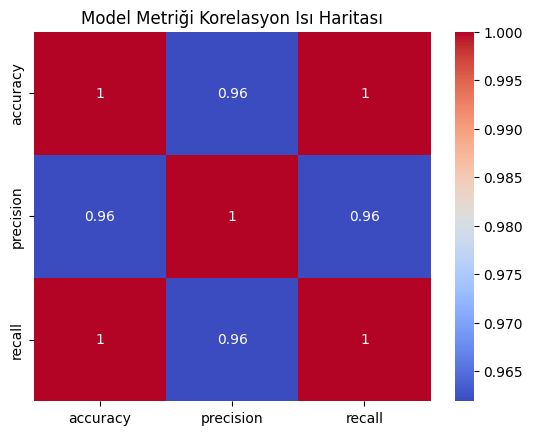

In [66]:
# Örnek veri
df = pd.DataFrame({
    "accuracy": [0.8, 0.82, 0.85, 0.88],
    "precision": [0.75, 0.78, 0.79, 0.81],
    "recall": [0.70, 0.72, 0.75, 0.78]
})

# Korelasyon matrisi oluştur
corr = df.corr()

# Heatmap ile görselleştir
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Model Metriği Korelasyon Isı Haritası")
plt.show()


Grafik Nasıl Yorumlanır?
Hücre rengi → İlişkinin gücünü gösterir:

🔴 Koyu kırmızı: Pozitif güçlü ilişki (yakınsa +1)

🔵 Koyu mavi: Negatif ilişki (yakınsa -1)

⚪ Beyaza yakın: İlişki yok (yakınsa 0)

Örneğin:

accuracy ile precision arasında 0.98 varsa → çok güçlü pozitif ilişki var, bu iki metrik birlikte artıyor demektir.

Eğer recall ile precision arasında -0.2 olsaydı → biri artarken diğeri hafif azalıyor olabilir.